In [59]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [60]:
img=cv.imread("class_pics - Copy\dhvani\IMG_20240131_153060 - Dhvani.Parekh Btech2021.jpg.jpeg")

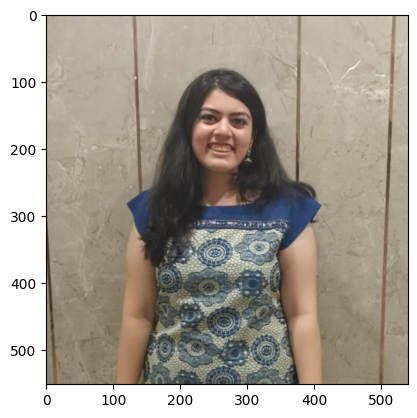

In [61]:
#opencv reads BGR and plt reads images as RGB channel format
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img) #RGB

In [62]:
from mtcnn.mtcnn import MTCNN
detector=MTCNN()
results=detector.detect_faces(img)

1/1 [==============================] - 0s 129ms/step


In [63]:
results

[{'box': [216, 108, 91, 127],
  'confidence': 0.9999994039535522,
  'keypoints': {'left_eye': (245, 155),
   'right_eye': (287, 160),
   'nose': (264, 178),
   'mouth_left': (242, 197),
   'mouth_right': (280, 202)}}]

In [64]:
x,y,w,h=results[0]['box']

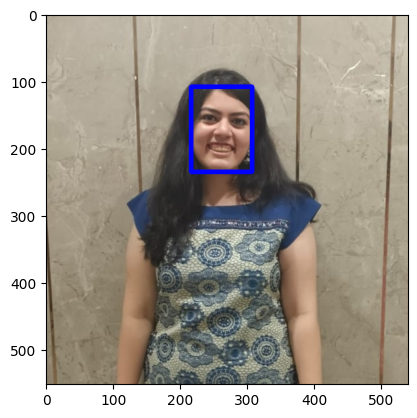

In [65]:
img=cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
plt.imshow(img)

In [66]:
my_face=img[y:y+h,x:x+w]

In [67]:
#Facenet takes as input 160x160
my_face=cv.resize(my_face,(160,160))

In [68]:

my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

Automate the preprocessing

In [69]:
class FACELOADING:
  def __init__(self,directory):
    self.directory=directory
    self.target_size=(160,160)
    self.X=[]
    self.Y=[]
    self.detector=MTCNN()

  def extract_face(self,filename):
    img=cv.imread(filename)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    x,y,w,h=self.detector.detect_faces(img)[0]['box']
    x,y=abs(x),abs(y)
    face=img[y:y+h,x:x+w]
    face_arr=cv.resize(face,self.target_size)
    return face_arr

  def load_face(self,dir):
    FACES=[]
    for im_name in os.listdir(dir):
      try:
        path=dir+im_name
        single_face=self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
      return FACES
  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path=self.directory+'/'+sub_dir+'/'
      FACES=self.load_face(path)
      labels=[sub_dir for _ in range(len(FACES))]
      print(f"Loaded successfully:{len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    plt.figure(figsize=(15, 15))
    for num,image in enumerate(self.X):
      ncols=5
      nrows=len(self.X)*15//ncols+1
      plt.subplot(nrows,ncols,num+1)
      plt.imshow(image)
      plt.axis('off')

In [70]:
faceloading=FACELOADING("class_pics - Copy")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 131ms/step
Loaded successfully:1
1/1 [==============================] - 0s 33ms/step
Loaded successfully:1
1/1 [==============================] - 0s 31ms/step
Loaded successfully:1
3/3 [==============================] - 0s 23ms/step
Loaded successfully:1
1/1 [==============================] - 0s 22ms/step
Loaded successfully:1
1/1 [==============================] - 0s 24ms/step
Loaded successfully:1
1/1 [==============================] - 0s 30ms/step
Loaded successfully:1
6/6 [==============================] - 0s 21ms/step
Loaded successfully:1
1/1 [==============================] - 0s 33ms/step
Loaded successfully:1
1/1 [==============================] - 0s 37ms/step
Loaded successfully:1
1/1 [==============================] - 0s 28ms/step
Loaded successfully:1
1/1 [==============================] - 0s 105ms/step
Loaded successfully:1
1/1 [==============================] - 0s 42ms/step
Loaded successfully:1
1/1 [==============================]

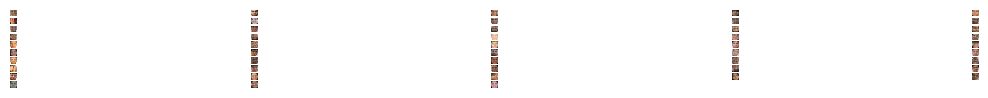

In [71]:
faceloading.plot_images()

#FACENET PART

In [72]:
pip install keras-facenet

In [73]:
from keras_facenet import FaceNet
embedder=FaceNet()

def get_embedding(face_img):
  face_img=face_img.astype('float32') #3D(160*160*3)
  face_img=np.expand_dims(face_img,axis=0) #4D(None*160*160*3)
  yhat=embedder.embeddings(face_img)
  return yhat[0]

In [74]:
EMBEDDED_X=[]

for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X=np.asarray(EMBEDDED_X)



1/1 [==============================] - 0s 102ms/step


In [75]:
#np.savez_compressed('faces_embeddings_done_final_classes.npz',EMBEDDED_X,Y)

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)


In [77]:
Y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(EMBEDDED_X,Y,shuffle=True, random_state=17)

In [79]:
t_img=cv.imread("dhvpic.jpg")
t_img=cv.cvtColor(t_img,cv.COLOR_BGR2RGB)
x,y,w,h=detector.detect_faces(t_img)[0]['box']


1/1 [==============================] - 0s 45ms/step


In [80]:
t_img=t_img[y:y+h,x:x+w]
t_img=cv.resize(t_img,(160,160))
test_img=get_embedding(t_img)

1/1 [==============================] - 0s 110ms/step


In [81]:
similarities = np.dot(EMBEDDED_X, test_img) / (np.linalg.norm(EMBEDDED_X, axis=1) * np.linalg.norm(test_img))
most_similar_index = np.argmax(similarities)

# Define a threshold to decide recognition
threshold = 0.5  

if similarities[most_similar_index] >= threshold:
    predicted_label = Y[most_similar_index]
else:
    predicted_label = "Unknown"

print("Predicted Label:", predicted_label)

Predicted Label: 6


In [82]:
y_pred=encoder.inverse_transform([predicted_label])

In [83]:
y_pred

array(['dhvani'], dtype='<U10')